In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=sns.load_dataset("flights")
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [18]:
# Convert to datetime
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
# Sort by date
df = df.sort_values('date')
print(df)

     year month  passengers       date
0    1949   Jan         112 1949-01-01
1    1949   Feb         118 1949-02-01
2    1949   Mar         132 1949-03-01
3    1949   Apr         129 1949-04-01
4    1949   May         121 1949-05-01
..    ...   ...         ...        ...
139  1960   Aug         606 1960-08-01
140  1960   Sep         508 1960-09-01
141  1960   Oct         461 1960-10-01
142  1960   Nov         390 1960-11-01
143  1960   Dec         432 1960-12-01

[144 rows x 4 columns]


In [19]:
print(df.isnull().sum())

year          0
month         0
passengers    0
date          0
dtype: int64


In [22]:
# Percent change in passengers (like daily returns)
df['returns'] = df['passengers'].pct_change()

# Moving averages (trend smoothing)
df['MA3'] = df['passengers'].rolling(3).mean()    # 3-month
df['MA12'] = df['passengers'].rolling(12).mean()  # 12-month
print(df)

     year month  passengers       date   returns         MA3        MA12
0    1949   Jan         112 1949-01-01       NaN         NaN         NaN
1    1949   Feb         118 1949-02-01  0.053571         NaN         NaN
2    1949   Mar         132 1949-03-01  0.118644  120.666667         NaN
3    1949   Apr         129 1949-04-01 -0.022727  126.333333         NaN
4    1949   May         121 1949-05-01 -0.062016  127.333333         NaN
..    ...   ...         ...        ...       ...         ...         ...
139  1960   Aug         606 1960-08-01 -0.025723  587.666667  463.333333
140  1960   Sep         508 1960-09-01 -0.161716  578.666667  467.083333
141  1960   Oct         461 1960-10-01 -0.092520  525.000000  471.583333
142  1960   Nov         390 1960-11-01 -0.154013  453.000000  473.916667
143  1960   Dec         432 1960-12-01  0.107692  427.666667  476.166667

[144 rows x 7 columns]


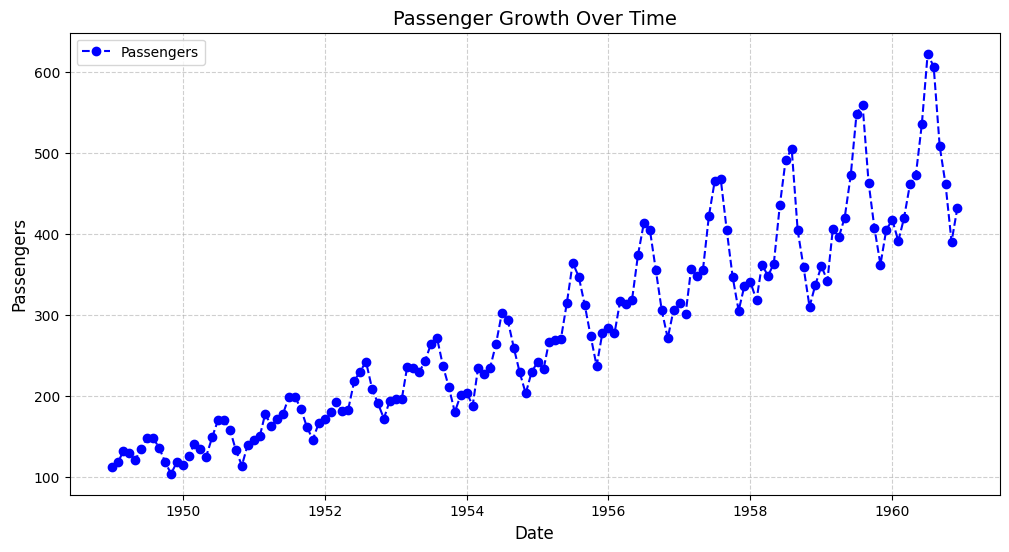

In [27]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['passengers'], 
         label="Passengers", color="blue", 
         marker='o', linestyle='--')

plt.title("Passenger Growth Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Passengers", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


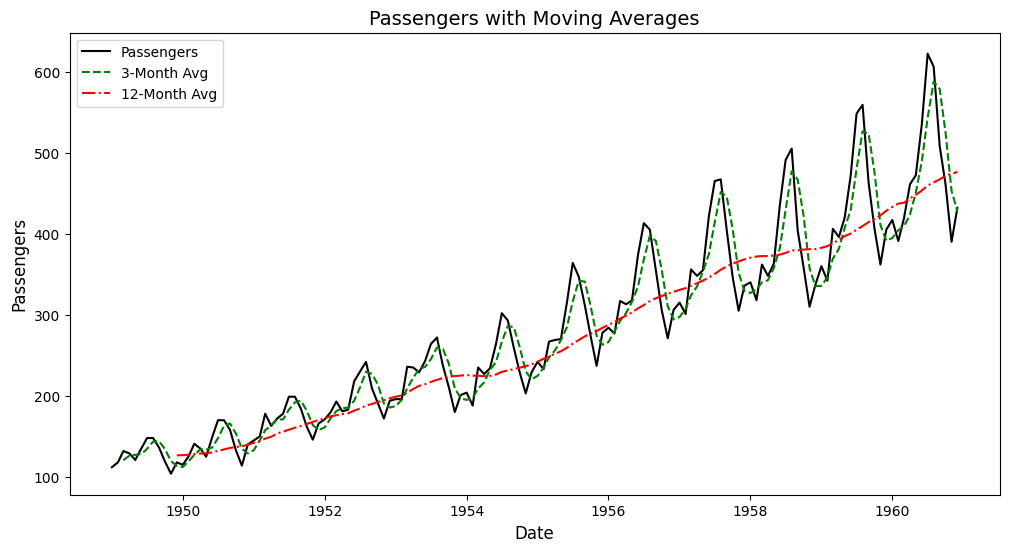

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['passengers'], label="Passengers", color="black")
plt.plot(df['date'], df['MA3'], label="3-Month Avg", color="green", linestyle='--')
plt.plot(df['date'], df['MA12'], label="12-Month Avg", color="red", linestyle='-.')

plt.title("Passengers with Moving Averages", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Passengers", fontsize=12)
plt.legend()
plt.show()


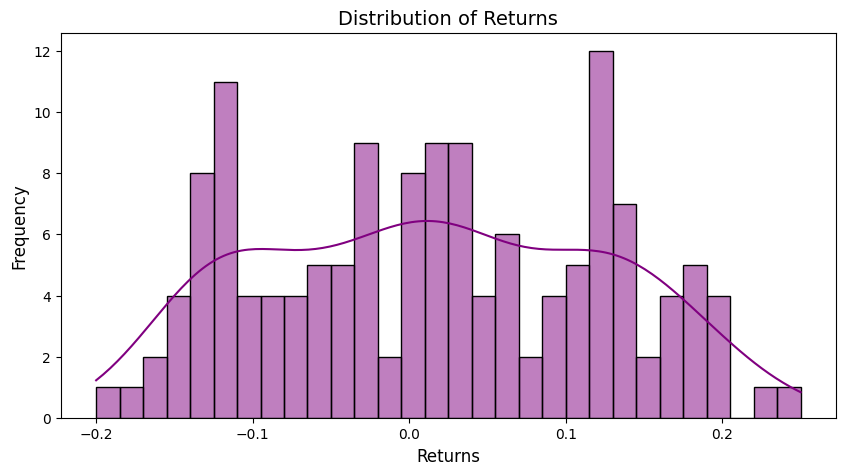

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df['returns'].dropna(), bins=30, kde=True, color="purple")

plt.title("Distribution of Returns", fontsize=14)
plt.xlabel("Returns", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


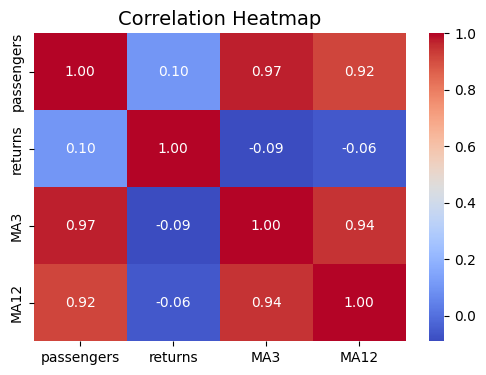

In [33]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['passengers','returns','MA3','MA12']].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap", fontsize=14)
plt.show()


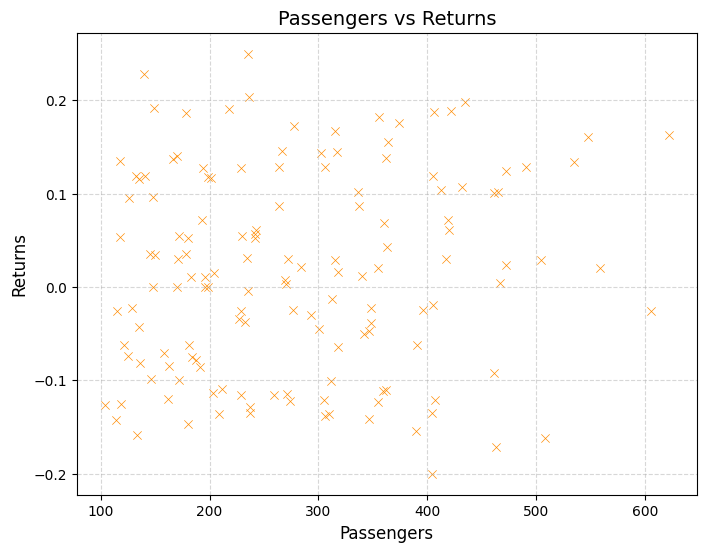

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="passengers", y="returns", data=df, 
                color="darkorange", marker="x")

plt.title("Passengers vs Returns", fontsize=14)
plt.xlabel("Passengers", fontsize=12)
plt.ylabel("Returns", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_4532\1736928910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="passengers", data=df, palette="Set2")


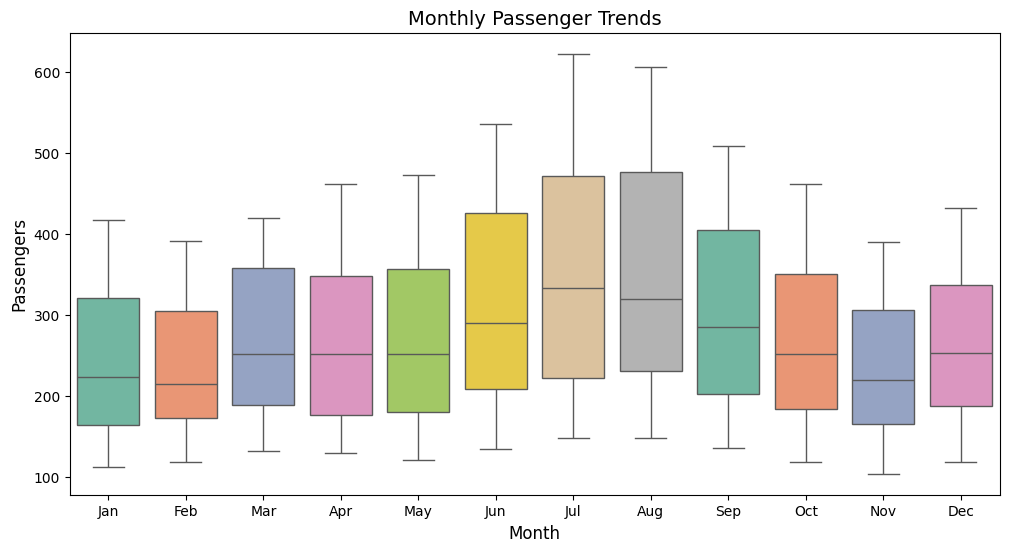

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x="month", y="passengers", data=df, palette="Set2")

plt.title("Monthly Passenger Trends", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Passengers", fontsize=12)
plt.show()
